## Step 1: Load the Dataset

Before we build our model, we need to load the cleaned dataset. 
The dataset contains Uber trip records with information like trip  distance, fare amount, pickup time, and day of the week

In [2]:
import pandas as pd

# Loading the dataset
df = pd.read_csv("uber_cleaned.csv")

# Display the first few rows for accuracy
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,pickup_hour,pickup_dayofweek
0,52:06.0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.68,19,Thursday
1,04:56.0,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.46,20,Friday
2,45:00.0,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.04,21,Monday
3,22:21.0,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.66,8,Friday
4,47:00.0,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.48,17,Thursday


## Step 2: One-Hot Encode 

Our Linear Regression model can't use text, so we need to conver the 'pickup_dayofweek" column into numeric format.

We'll do this using one-hot encoding, which creates a new column for each day of the week with values of 0 or 1

We'll also use 'drop_first=True' to drop one day to avoid multicollinearity, which is when features are too similar to each other.

In [3]:
# One hot encode the pikup_dayofweek column

df_encoded = pd.get_dummies(df, columns=['pickup_dayofweek'], drop_first=True)

# Preview the updated DF
df_encoded.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,pickup_hour,pickup_dayofweek_Monday,pickup_dayofweek_Saturday,pickup_dayofweek_Sunday,pickup_dayofweek_Thursday,pickup_dayofweek_Tuesday,pickup_dayofweek_Wednesday
0,52:06.0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.68,19,False,False,False,True,False,False
1,04:56.0,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.46,20,False,False,False,False,False,False
2,45:00.0,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.04,21,True,False,False,False,False,False
3,22:21.0,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.66,8,False,False,False,False,False,False
4,47:00.0,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.48,17,False,False,False,True,False,False


We now have new columns like `pickup_dayofweek_Monday`, `pickup_dayofweek_Tuesday`, etc.
Each row has a 1 in the column for the correct day and 0s in the others.

This gives the model numeric values it can use to learn how day of the week affects fare price.

## Step 3: Select Features and Split Data
Now that we have encoded `pickup_dayofweek` we're ready to prepare the data for modeling.

In this step we'll select the features `trip_distance`, `pickup_hour`, `passenger_count`, and the one-hot encoded day-of-week columns. 

Then we'll set the target variables as `fare_amount`

Aftwerwards we will split the data into training and test sets (80/20)

In [4]:
from sklearn.model_selection import train_test_split

# select features
features = ['trip_distance', 'pickup_hour', 'passenger_count'] + \
[col for col in df_encoded.columns if col.startswith('pickup_dayofweek_')] 

X = df_encoded[features]
y = df_encoded['fare_amount']

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the splits
X_train.shape, X_test.shape

((154812, 9), (38703, 9))

Our data has been successfully split:
* 154,812 rows in the training set.
* 38,703 row in the testing set.
* Each with 9 features (distance, hour, passenger count, and day-of-week columns)

# Step 4: Train the Linear Regression Model
Next we'll train the linear regression model by fiting the model using the training data. 
This model will learn how each feature affects `fare_amount`

In [5]:
from sklearn.linear_model import LinearRegression

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

This code created the model and trained it using `X_train` and `y_train`

# Step 5: Predict and Evaluate the Model
Next we'll use the model to predict fares on the test set. We will also Calculate how well the model performed using R^2 (how much variance is explained), RMSE (typical error size) and MAE (average absolute error)

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict fare amounts for the test set
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Show the results
print(f"R2 Score: {r2:.3f}")
print(f"RMSE: ${rmse:.2f}")
print(f"Mae: ${mae: .2f}")

R2 Score: 0.786
RMSE: $4.36
Mae: $ 2.32


R2 Score: Our model explains about 78.6% of the variance in fare prices.
RMSE: On average, predictions are off by about $4.36
MAE: The typical absolute error is aroud $2.32

In [7]:
# Create a labeled Serires of the model coefficients
coefficients = pd.Series(model.coef_, index=X.columns)

# Sort and display then
coefficients.sort_values(ascending=False)

trip_distance                 2.327783
passenger_count               0.045283
pickup_dayofweek_Thursday     0.040341
pickup_dayofweek_Wednesday    0.020685
pickup_hour                   0.008850
pickup_dayofweek_Tuesday     -0.150596
pickup_dayofweek_Monday      -0.295006
pickup_dayofweek_Saturday    -0.447182
pickup_dayofweek_Sunday      -0.545942
dtype: float64

* Trip Distance has the strongest impact. 
    * For every additional mile, the fare increases by approxmiately $2.33. This confirms that trip length is the most influential factor in determining fare prices.
* Day of the Week affects fares relaive to Friday
    * Sunday and Saturday trips are significantly cheaper, by about $0.55 and $0.45 
    * Monday and Tuesday also show lower fares
    * Wednesday and Thursday are slightly more expensive than Friday
* Time of Day (pickup_hour) has a very small positive effect.
    * Each hour later in the day increases fare by only about $0.009, suggesting hour of day alone is not a major driver of price in this model.
* Passenger Count has a minimal effect
    * Fares go up by about $0.045 for each additional passenger, which likely reflects minor pricing adjustments or rounding.

<function matplotlib.pyplot.show(close=None, block=None)>

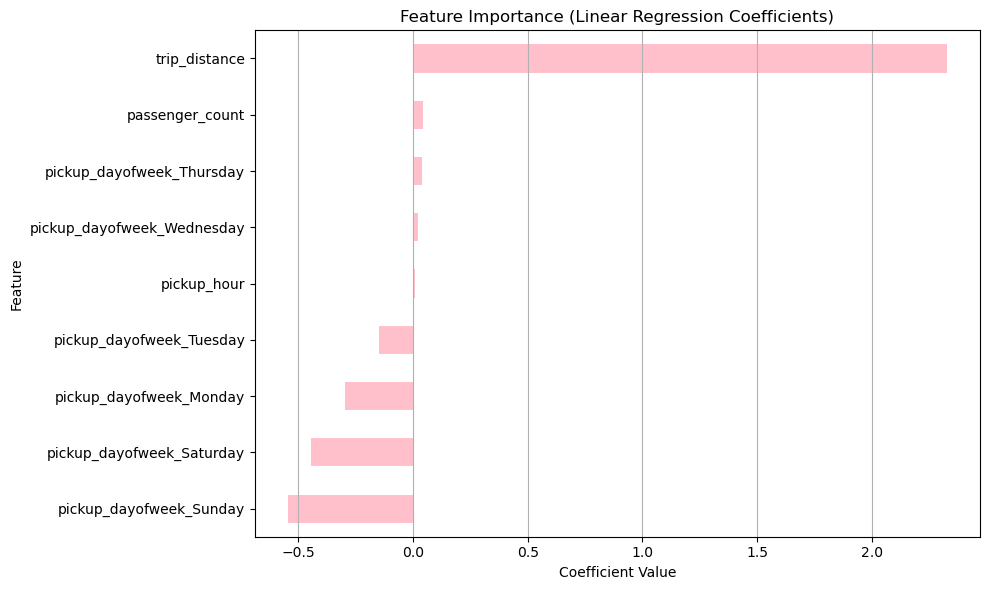

In [25]:
import matplotlib.pyplot as plt

# sort coefficients
sorted_coef = coefficients.sort_values()

# plot as horizontal bar chart
plt.figure(figsize=(10, 6))
sorted_coef.plot(kind='barh', color='pink')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.tight_layout()
plt.show

This bar chart visualizes the coefficients learned by the Linear Regression model. Each bar shows the impact of that feature on the predicted Uber fare amount.

Key takeaways
* Trip Distance has the largest positive effect.
    - The taller bar means its the most important feature. For ever 1 mile increase in distance, the fare goes up by approximately $2.33
* Day of the Week affects pricing relative to Friday 
     - Sunday has the most negative effect. Fares are around $0.55 cheaper than on Fridays.
    - Saturday, Monday, and Tuesday also reduce fares, but to a lesser extent.
     - Thursday and Wednesday slightly increase fares.
* Pickup Hour and Passenger Count have minimal influence.
    - This suggests time of day and number of passengers don't significantly impact fare in a linear way.
This helps confirm that trip distance is the dominant predictor of fare. It also shows subtle pricing differences by day, which could inform dynamic pricing strategies.


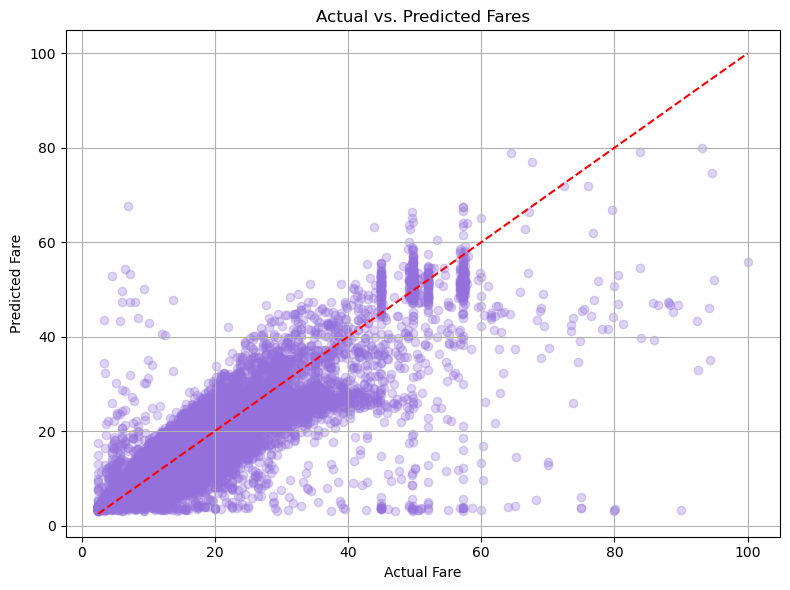

In [31]:
# Create a scatter plot of actual vs predicted fare amounts
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='mediumpurple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Prediction line
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs. Predicted Fares')
plt.grid(True)
plt.tight_layout()
plt.show()

This scatter plot compares the actual fare amounts to the predicted fares from the Linear Regression model.
The red dashed line represents a perfect prediction, where the predicted fare equals the actual fare.
* Most points cluster close to the line, especially for fares uner $40, indicating that the model performs well on typical trip prices.
* Predictions for higher fare trips tend to fall below the line, meaning the model often underestimates expensive rides.
* Some horizontal groupings suggest fixed-rate trips, like airport rides, which the linear model may not fully capture.

Overall, the model provides a good approximation for most fares, but struggles slightly with outliers and very high-priced trips.

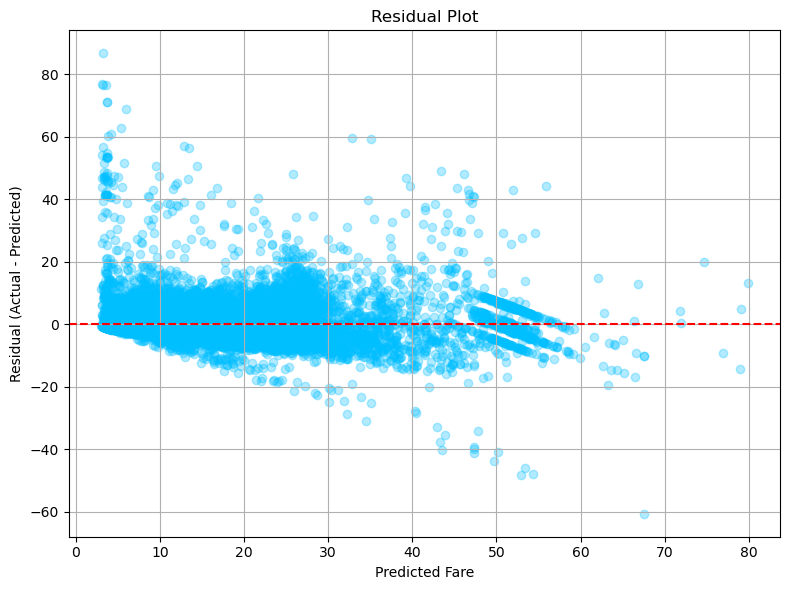

In [32]:
# Calculate residuals
residuals = y_test - y_pred

# Create the residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.3, color='deepskyblue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Fare')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()

This residual plot displays the difference between actual and predicted fare amounts for each trip.
The red dashed line at 0 represents perfect predictions. The closer the points are to this ine, the more accurate the model.

* Most residuals are clustered around zero, especially for typical fare ranges, which shows the model is generally well-calibrated.
* Positive residuals, above the line, indicate underpredictions, where actual fares were higher than predicted. 
* Negative residuals, below the line, indicate overpredictions.
* There's some increasing spread for lower predicted fares and a tapering effect for high predicted fares, which suggest there are possible non-linearity or variance in lower cost rides and the model struggles more with outliers and extreme values.

# Conclusion: Linear Regression
The Linear Regression model was trained to predict Uber fare amounts using features such as trip distance, pickup time, day of the week, and passenger count. After training and evaluating the model, several key insights emerged.

* Trip distance is by far the most influential predictor of fare, contributing approximately $2.33 per mile.
* Day of the week has moderate effects, with Sundays and Saturdays showing consistently lower fares compared to Fridays.
* Pickup hour and passenger count have minimal impact, suggesting that they don't strongly ifluence fare amounts in a linear context.
* The model achieved a solid R² score of about 0.79, meaning it explains around 78% of the variability in fare amounts.
* Actual vs. Predicted and residual plots show that the model performs well for most trips but it tends to underpredict very expensive fares and struggles slighty with fixed-rate or outlier rides.

Linear Regression is a strong baseline model for fare prediction, especially for typical, midrange trips. However, further improvements may be possible using more complex models to capture nonlinear effects and outlier behavior.